#CODER HOUSE

##Data Science 3

04/07/2025


###Proyecto final NLP

##Introduccion, contexto e hipotesis.

El trabajo responde a una actividad practica basica de NLP. Se carga un data set desde la api de Kaggle con el objetivo de iniciar un proyecto de reconocimiento de emociones.


La hipotesis es que es posible usar algoritmos basicos de NLP para el reconocimiento basico de emociones en reviews de peliculas varias.

##Instalacion, actulizacion e importado de librerias escenciales.

In [25]:
!pip install -U spacy
!python -m spacy download en_core_web_sm
import pandas as pd
import spacy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#Preparacion del entorno y cargar del data set.

In [26]:
# Crear un directorio para la configuración de Kaggle
!mkdir -p ~/.kaggle

# Mover el archivo kaggle.json al directorio creado
!cp kaggle.json ~/.kaggle/

# Asignar los permisos correctos al archivo (lectura y escritura solo para ti)
!chmod 600 ~/.kaggle/kaggle.json

In [27]:
# Descarga el dataset utilizando el comando de la API
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
# Descomprimir el archivo descargado
!unzip imdb-dataset-of-50k-movie-reviews

Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [28]:
# Cargar el archivo CSV en un DataFrame
imdb_reviews = pd.read_csv('IMDB Dataset.csv')


imdb_reviews.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


##Carga y exploracion de los datos.

In [29]:
print(f"El dataset tiene {imdb_reviews.shape[0]} filas y {imdb_reviews.shape[1]} columnas.")

El dataset tiene 50000 filas y 2 columnas.


In [30]:
# Contar cuántas reseñas hay para cada calificación
score_counts = imdb_reviews['sentiment'].value_counts()
print(score_counts)

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [31]:
# Cargar el dataset
df = pd.read_csv('IMDB Dataset.csv')

# Crear columna 'Sentimiento': 1 si positivo, 0 si negativo
df['Sentimiento'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Mostrar primeras filas para verificar
print(df[['sentiment', 'Sentimiento', 'review']].head())


  sentiment  Sentimiento                                             review
0  positive            1  One of the other reviewers has mentioned that ...
1  positive            1  A wonderful little production. <br /><br />The...
2  positive            1  I thought this was a wonderful way to spend ti...
3  negative            0  Basically there's a family where a little boy ...
4  positive            1  Petter Mattei's "Love in the Time of Money" is...


##Creacion, entrenamiento y evaluacion del modelo.

In [36]:


# Cargar modelo spaCy en inglés
nlp = spacy.load('en_core_web_sm')

# Extraer la lista de textos
textos = df['review'].tolist()

# Aplicar procesamiento en lote
docs = list(nlp.pipe(textos))

# Limpiar cada texto
textos_limpios = []
for doc in docs:
    lemmas_limpios = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct
    ]
    textos_limpios.append(" ".join(lemmas_limpios))

# Verificar que la longitud coincida
print(f"len(textos_limpios): {len(textos_limpios)}, len(df): {len(df)}")

# Agregar la columna al DataFrame
df['review_limpio'] = textos_limpios

# Verificar el resultado
print("¡Procesamiento completado!")
print(df[['review', 'review_limpio']].head())


len(textos_limpios): 50000, len(df): 50000
¡Procesamiento completado!
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                       review_limpio  
0  reviewer mention watch 1 oz episode hook right...  
1  wonderful little production < br /><br />the f...  
2  think wonderful way spend time hot summer week...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...  


In [37]:
from sklearn.model_selection import train_test_split

X = df['review_limpio']
y = df['Sentimiento']  # columna con 0 (negativo) y 1 (positivo)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)




In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # o ajustá este número

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [39]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

Accuracy del modelo: 88.56%

Reporte de Clasificación:
              precision    recall  f1-score   support

Negativo (0)       0.89      0.87      0.88      5000
Positivo (1)       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



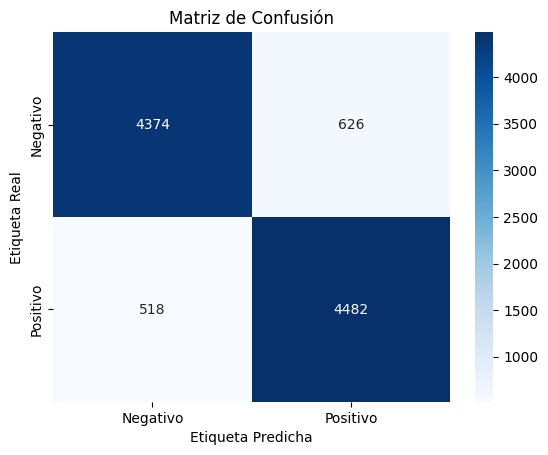

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones
predicciones = modelo.predict(X_test_tfidf)

# Precisión
accuracy = accuracy_score(y_test, predicciones)
print(f"Accuracy del modelo: {accuracy:.2%}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predicciones, target_names=['Negativo (0)', 'Positivo (1)']))

# Matriz de confusión
cm = confusion_matrix(y_test, predicciones)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()
